In [1]:
import xarray as xr
import dask
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import integrate
#import tqdm
import matplotlib
import datetime
import pickle
import pandas as pd
import itertools
from scipy.stats import t
from scipy.stats import linregress
import statsmodels.api as sm
import scipy.stats as stats
colors =itertools.cycle(plt.get_cmap('magma')(np.linspace(0.2,0.8, 3)))
color1=next(colors)

color3=next(colors)
color2=next(colors)
import seaborn as sns
sns.set('paper')

#import basemap
#fig sizes
Wf=(190/25.4)
Hf=(230/25.4)
Wf4=(95/25.4)
Hf4=(115/25.4)


In [2]:
# Plot timeseries of all the relevant variables

timeseries_vars = [
    'O2',
    'OmegaA',
    'T',
    # 'ALK_norm',
    # 'DIC_norm',
    # 'ALK',
    # 'DIC',
]


long_names = dict(
    O2=r"$\mathrm{O}_2$",
    OmegaA="$\Omega_A$",
    T="T"
    # ALK_norm="Normalized Alkalinity",
    # DIC_norm="Normalized DIC",
    # ALK="Alkalinity",
    # DIC="DIC",
)

units = dict(
    O2="mmol m$^{-3}$",
    OmegaA="(non-dimensional)",
    T="$^\circ$C",
    
    # ALK_norm="mmolk m$^{-3}$",
    # DIC_norm="mmolk m$^{-3}$",
    # ALK="mmolk m$^{-3}$",
    # DIC="mmolk m$^{-3}$"
)
color1='#00CD6C'#green
color2='#AF58BA'#purple
color3='#FFC61E' #yello
color4='#009ADE' #blue
color5='#F28522' #orange
color6='#A0B1BA' #gray
color7='#A6761D'#brown
color8='#FF1F5B' #red

In [3]:
df = pd.read_csv ('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/pdo.timeseries.ersstv5.csv')
Time=df.Date.values
PDO=df.PDO.values
TIME = [datetime.datetime.strptime(t0,'%Y-%m-%d') for t0 in Time[1:]] 
print(TIME[12*142-1], TIME[-36], np.shape(Time), np.shape(PDO))
datesPDO=TIME[12*142-1:-36]
dataPDO=PDO[12*142:-36]

1996-01-01 00:00:00 2020-01-01 00:00:00 (2028,) (2028,)


In [4]:
data=[]; count=0
with open('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/npgo.txt') as f:
    for line in f.readlines():
        l1=line.strip()
        l2=l1.split()
        count=count+1
        if count>30:
            try:
                #print(l2[0])
                year=int(float(l2[0]))
                #print(year)
                if (year >1995) & (year<2020):
                    #print(year)
                    #count=count+1
                    dat=float(l2[2])
                    #print((dat))

                    data.append(dat)
                    #print(data)
            except Exception as ex:
                print('exception', ex)
dataNPGO =np.array(data)
datesNPGO=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M').values

exception could not convert string to float: '</pre>'
exception list index out of range
exception list index out of range
exception list index out of range
exception list index out of range
exception list index out of range
exception could not convert string to float: '</body></html>'


/tmp/ipykernel_52859/4062860804.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datesNPGO=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M').values


In [5]:
dataM=[]; count=0
with open('/gpfs/fs7/dfo/hpcmc/pfm/amh001/DATA/Climate-Indices/meiv2.data') as f:
    for line in f.readlines():
        l1=line.strip()
        l2=l1.split()
        try:
            #print(l2)
            year=int(l2[0])
            #print(year)
            if (year >1995) & (year<2020):
                #print(year)
                count=count+1
                dat=[float(num) for num in l2[1:]]
                #print(len(dat))
                
                dataM.extend(dat)
        except:
            print('exception', l2)
dataM =np.array(dataM)
datesM=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M')
#print(dates)

exception ['-999.00']
exception ['Multivariate', 'ENSO', 'Index', 'Version', '2', '(MEI.v2)']
exception ['https://www.psl.noaa.gov/enso/mei']
exception ['Row', 'values', 'are', '2', 'month', 'seasons', '(YEAR', 'DJ', 'JF', 'FM', 'MA', 'AM', 'MJ', 'JJ', 'JA', 'AS', 'SO', 'ON', 'ND)']


/tmp/ipykernel_52859/1121452055.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datesM=pd.date_range(start="1996-01-01",end="2020-01-01", freq='M')


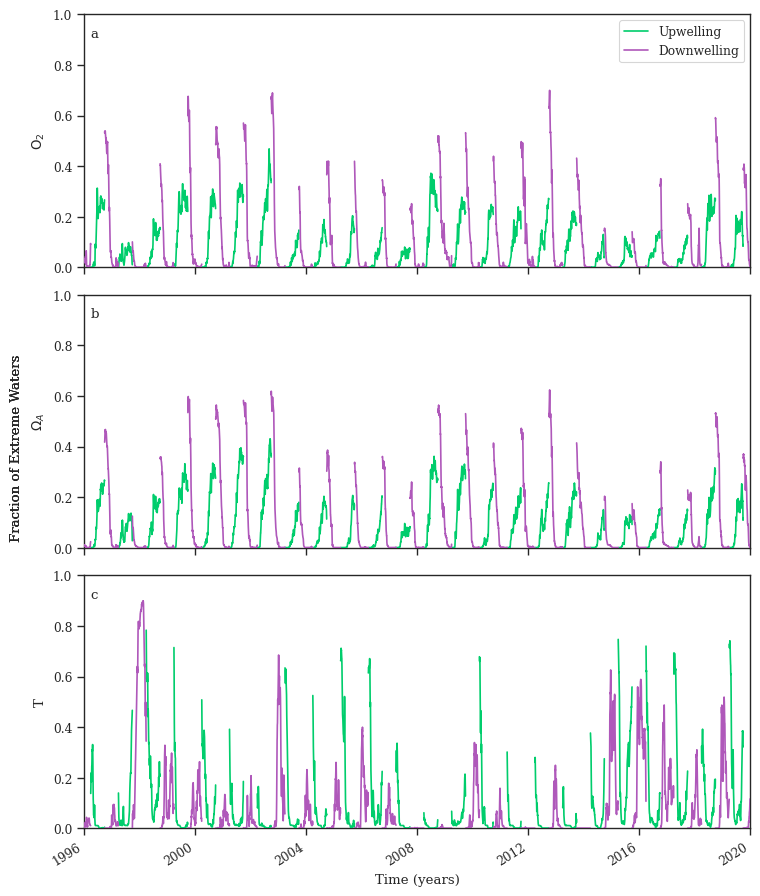

In [6]:
#sns.set('notebook')
sns.set_style('ticks')
at=0.01
bt=0.95
plt.rcParams["font.family"] = "Serif"
num=4
subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(3,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_'+str(num)+'_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
                
    if idx==0:
        plt.legend()
    #plt.grid(axis='x')

            
    #if idx==2:
    #    pass
    #else:
    #    ax2 = ax.twinx()
    #    ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
    #    ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        ##ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
    #    ax2.set_ylabel(r'NPGO')
    ax.set_ylabel(f'{long_names[var]}')

    if idx==2:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,1])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    plt.tight_layout()
#plt.savefig('../Figures/cluster_'+str(num)+'_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

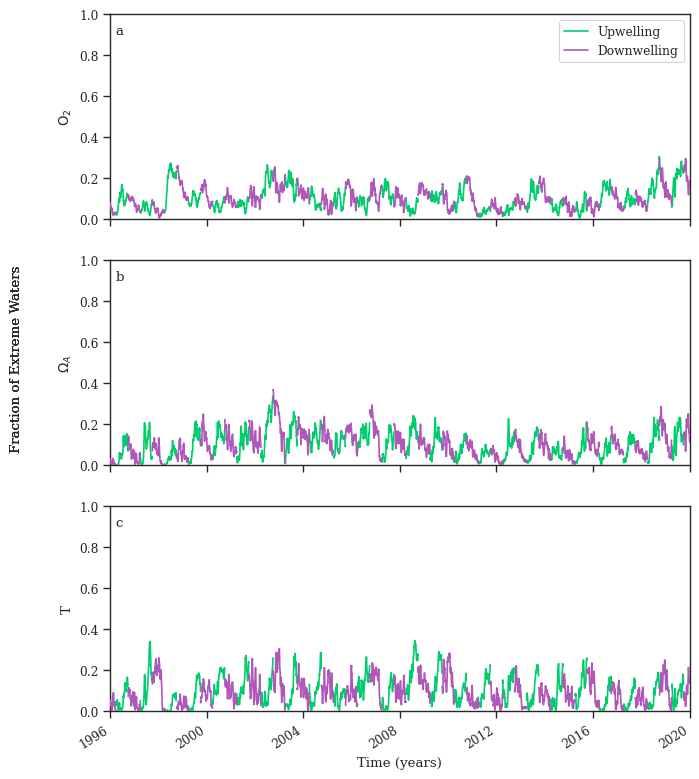

In [7]:
at=0.01
bt=0.95

#subpanel=['A', 'B', 'C', 'D', 'E']
mcolors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for idx, var in enumerate(timeseries_vars):
    ax = fig.add_subplot(3,1,idx+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_2_'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=mcolors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if idx==0:
        plt.legend()
        
    #ax2 = ax.twinx()
    #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
    #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
    #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
    ax.set_ylabel(f'{long_names[var]}')
    if idx==2:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]])  
    ax.set_ylim([0,1])
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)

    ax.text(at, bt, subpanel[idx], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
#plt.savefig('../Figures/Shallows_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)

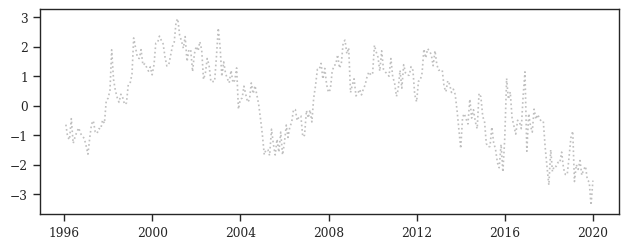

In [8]:
fig = plt.figure(**figprops)

figprops = dict(figsize=(Wf,Hf))
ax = fig.add_subplot(3,1,idx+1)

ax.plot( datesNPGO,dataNPGO, color='0.5', alpha=0.5, linestyle=':')

## Compound Extremes

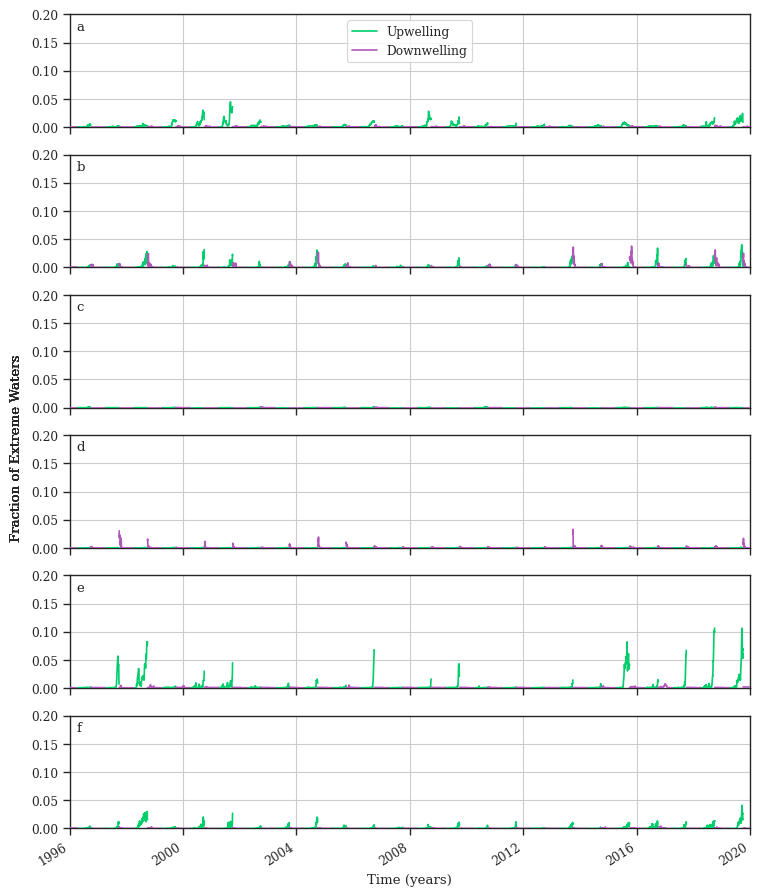

In [9]:

at=0.01
bt=0.95

dual_extreme = list(itertools.combinations(timeseries_vars, 2))
dual_extreme += [('T','O2','OmegaA')]
labelnames = [r'$\mathrm{O}_2$ and $\Omega_A$', r'$\mathrm{O}_2$ and T', r'$\Omega_A$ and T',r'T and $\mathrm{O}_2$ and $\Omega_A$']


#long_names0 = list(itertools.combinations(long_names, 2))


subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
idx=3
for cluster_id in np.arange(6):
    var=dual_extreme[3]
    ax = fig.add_subplot(6,1,cluster_id+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_'+str(cluster_id)+'_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        for i, dfg in df.groupby('group'):
            if i==1:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100, label=label)
            else:
                ax.plot(dfg['x'].values, dfg['y'].values, c=color, zorder=100)
    if cluster_id==0:
        plt.legend(loc='upper center')

            
    #if idx==2:
     #   pass
    #else:
        #ax2 = ax.twinx()
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        #ax2.set_ylabel(r'NPGO')
    #ax.set_ylabel( labelnames[idx] )

    if cluster_id==5:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]]) 
    ax.set_ylim([0,0.2])
    ax.text(at, bt, subpanel[cluster_id], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    plt.grid('on')

    plt.tight_layout()
#plt.savefig('../Figures/AllClusters_Triple_Compound_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

In [10]:



at=0.01
bt=0.95

dual_extreme = list(itertools.combinations(timeseries_vars, 2))
dual_extreme += [('T','O2','OmegaA')]
labelnames = [r'$\mathrm{O}_2$ and $\Omega_A$', r'$\mathrm{O}_2$ and T', r'$\Omega_A$ and T',r'T and $\mathrm{O}_2$ and $\Omega_A$']


#long_names0 = list(itertools.combinations(long_names, 2))


subpanel=['a', 'b', 'c', 'd', 'e', 'f']
colors=[color1, color2]
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
idx=3
for cluster_id in np.arange(0):
    var=dual_extreme[3]
    ax = fig.add_subplot(6,1,cluster_id+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_'+str(cluster_id)+'_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'_corr.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        if ii==0:
            upw=df.to_dataset(name='var', promote_attrs=True)   
        else:
            dwn=df.to_dataset(name='var', promote_attrs=True) 
    #color=colors[idx]
    merged_da = xr.merge([dwn,upw])
    #print(merged_da.time, merged_da)
    X=merged_da.time.values
    Y=merged_da['var'].values
    print('X,Y',X, Y)
    XX=[X.astype('datetime64[s]').astype('int') for x in X]
    # Fit the model
    correlation, p_value = stats.spearmanr(XX, Y)
    print(f"Spearman correlation: {correlation}, p-value: {p_value}")

    #model = sm.OLS(Y, XX)
    #results = model.fit()
    #print(results.summary())
    if cluster_id==0:
        plt.legend(loc='upper center')

            
    #if idx==2:
     #   pass
    #else:
        #ax2 = ax.twinx()
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO<0,color=color8, alpha=0.1, interpolate=True, zorder=1)
        #ax2.fill_between( datesNPGO,dataNPGO,np.zeros(len(dataNPGO)),where= dataNPGO>0,color=color4, alpha=0.2, interpolate=True, zorder=1)
        #ax2.plot( datesNPGO,dataNPGO, color='0.5', alpha=1, linestyle=':')
        #ax2.set_ylabel(r'NPGO')
    #ax.set_ylabel( labelnames[idx] )

    if cluster_id==5:
        ax.set_xlabel('Time (years)')
    else:
        ax.set_xticklabels([])
    for label in ax.get_xticklabels():
        label.set_rotation(32)
        label.set_horizontalalignment("right")
    plt.axis('tight')
    X=ax.get_xticks()
    plt.xlim([X[1], X[-2]]) 
    ax.set_ylim([0,0.2])
    ax.text(at, bt, subpanel[cluster_id], transform=ax.transAxes,  va='top', fontweight='normal',zorder=1000)
    fig.text(0.0,0.5, "Fraction of Extreme Waters", ha="center", va="center", rotation=90)
    plt.grid('on')

    plt.tight_layout()
#plt.savefig('../Figures/AllClusters_Triple_Compound_Extremes.png', format='png', bbox_inches='tight',transparent=False,dpi=500)      

<Figure size 748.031x905.512 with 0 Axes>

To adjust for autocorrelation, we will use the method of Bretherton et al 1999. 

In [11]:
def bretherton_adjustment(y):
    r1 = np.corrcoef(y[:-1], y[1:])[0, 1]
    Nt = len(y)
    Ne = Nt * (1 - r1) / (1 + r1)
    return Ne, r1

# Usage
#Ne, r1 = bretherton_adjustment(y)
#print(f"Effective Sample Size: {Ne}")

There is an apparent linear trend in some of the triple extremes. Here, I test for significance. 



-------------------------------------------------------------
testing for a linear trend in cluster = 0
Spearman correlation: 0.07928898501696412, p-value: 1.0517832260397865e-13
Kendall's tau: 0.046528944584602834
P-value: 3.594004898102372e-10
The trend is significant according to the Mann-Kendall test!!
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.01372
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.907
Time:                        20:26:09   Log-Likelihood:                 36680.
No. Observations:                8766   AIC:                        -7.336e+04
Df Residuals:                    8764   BIC:                        -7.334e+04
Df Model:                           1                       

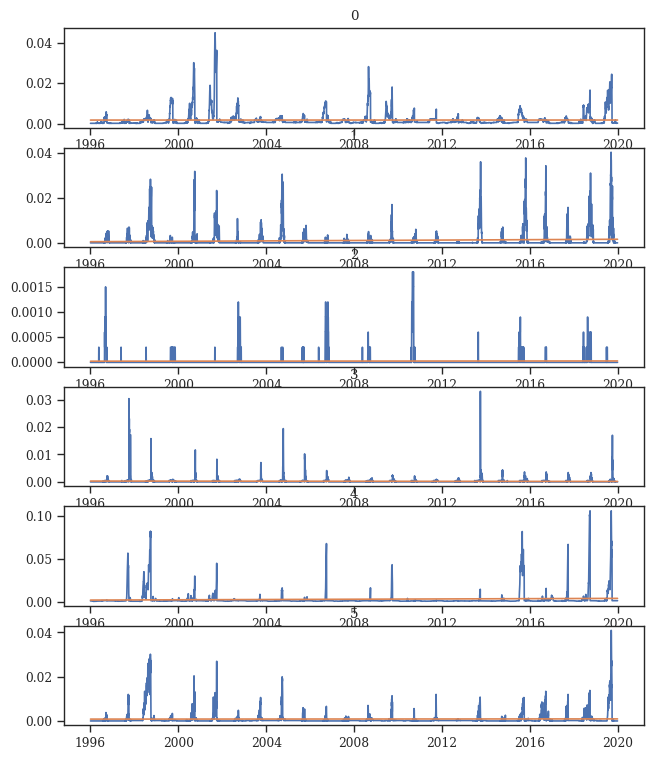

In [12]:

#import pymannkendall as mk
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for cluster_id in np.arange(6):
    var=dual_extreme[3]
    ax = fig.add_subplot(6,1,cluster_id+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_'+str(cluster_id)+'_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'_corr.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=colors[ii]
        if ii==0:
            upw=df.to_dataset(name='var', promote_attrs=True)   
        else:
            dwn=df.to_dataset(name='var', promote_attrs=True) 
    #color=colors[idx]
    merged_da = xr.merge([dwn,upw])
    #print(merged_da.time, merged_da)
    X=merged_da.time.values
    Y=merged_da['var'].values
    #print('X,Y',X, Y)
    plt.plot(X,Y)
    XX=[x.astype('datetime64[s]').astype('int') for x in X]
    print('-------------------------------------------------------------')

    print('testing for a linear trend in cluster =', cluster_id)
    correlation, p_value = stats.spearmanr(XX, Y)
    print(f"Spearman correlation: {correlation}, p-value: {p_value}")
    # Mann-Kendall Trend Test
    tau, p_value = stats.kendalltau(XX, Y)

    print(f"Kendall's tau: {tau}")
    print(f"P-value: {p_value}")
    if p_value<0.05:
        print('The trend is significant according to the Mann-Kendall test!!')

    # Add a constant (intercept) to the model
    XX_WC = sm.add_constant(XX)
    model = sm.OLS(Y, XX_WC)
    results = model.fit()
    # Get the fitted values (predicted y-values)
    y_pred = results.predict(XX_WC)
    #result = mk.test(Y)
    print(results.summary())
   # print('t_test', results.t_test([1, 0]))
    
    slope, intercept, r_value, p_value, std_err = linregress(XX,Y)
    print(f"Slope: { 3600.*24*365*slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    if p_value<0.05:
        print('The trend is significant according to the t-test')
    plt.plot(X,y_pred)
    plt.title(str(cluster_id))

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

def block_bootstrap_trend_with_visualization(values, dates, block_size=365, n_iterations=1000, ci_percentile=95):
    """
    Perform block bootstrapping to estimate trends, calculate a bootstrap-based p-value,
    visualize the results, and return the confidence interval of the bootstrap slopes.

    Parameters:
        values (np.ndarray): Array of daily data values.
        dates (np.ndarray): Array of dates corresponding to the values (in datetime64 format).
        block_size (int): Approximate size of blocks in days (default is 365 for yearly blocks).
        n_iterations (int): Number of bootstrap iterations.
        ci_percentile (float): Percentile for confidence interval (default is 95).

    Returns:
        original_slope (float): Slope calculated from the original data in units of years.
        bootstrap_slopes (list): List of slope values from bootstrap samples in units of years.
        bootstrap_p_value (float): Bootstrap-based p-value.
        ci_lower (float): Lower bound of the confidence interval.
        ci_upper (float): Upper bound of the confidence interval.
    """
    if len(values) != len(dates):
        raise ValueError("The values and dates arrays must have the same length.")
    
    # Convert dates to timestamps (seconds since the epoch)
    dates_timestamp = np.array([x.astype('datetime64[s]').astype('int') for x in dates])
    
    # Calculate the original slope (in units per second)
    x_original = np.arange(len(values))
    original_slope, _, _, _, _ = linregress(dates_timestamp, values)
    
    # Convert the original slope to years (seconds per year)
    seconds_per_year = 365.25 * 24 * 60 * 60  # accounting for leap years roughly
    original_slope_years = original_slope * seconds_per_year
    
    years = np.unique(dates.astype("datetime64[Y]"))
    bootstrap_slopes = []
    
    for _ in range(n_iterations):
        # Sampling years with replacement
        sampled_years = np.random.choice(years, size=len(years), replace=True)
        sampled_indices = np.isin(dates.astype("datetime64[Y]"), sampled_years)
        bootstrap_sample = values[sampled_indices]
        bootstrap_dates_timestamp = dates_timestamp[sampled_indices]
        
        slope, _, _, _, _ = linregress(bootstrap_dates_timestamp, bootstrap_sample)
        
        # Convert the bootstrap slope to years (seconds per year)
        bootstrap_slope_years = slope * seconds_per_year
        bootstrap_slopes.append(bootstrap_slope_years)
    
    # Calculate one-sided bootstrap p-value
    if original_slope_years > 0:
        # Positive slope: p-value is proportion of bootstrap slopes >= original slope
        bootstrap_p_value = np.mean(np.array(bootstrap_slopes) >= original_slope_years)
        extreme_slopes = np.array(bootstrap_slopes) >= original_slope_years
    else:
        # Negative slope: p-value is proportion of bootstrap slopes <= original slope
        bootstrap_p_value = np.mean(np.array(bootstrap_slopes) <= original_slope_years)
        extreme_slopes = np.array(bootstrap_slopes) <= original_slope_years
    
    # Calculate the confidence interval (e.g., 95% CI)
    ci_lower = np.percentile(bootstrap_slopes, (100 - ci_percentile) / 2)
    ci_upper = np.percentile(bootstrap_slopes, 100 - (100 - ci_percentile) / 2)
    
    # Visualization
    plt.figure(figsize=(5,4))
    
    # Histogram of bootstrap slopes
    plt.hist(bootstrap_slopes, bins=30, alpha=0.7, color='skyblue', label="Bootstrap Slopes")
    
    # Original slope as vertical line
    plt.axvline(original_slope_years, color='red', linestyle='--', linewidth=2, label=f"Original Slope = {original_slope_years:.5f} units/year")
    
    # Shading extreme regions
    plt.hist(np.array(bootstrap_slopes)[extreme_slopes], bins=30, alpha=0.4, color='orange', label="Extreme Slopes")
    
    # Confidence interval lines
    plt.axvline(ci_lower, color='green', linestyle='-.', linewidth=2, label=f"{ci_percentile}% CI Lower = {ci_lower:.5f} units/year")
    plt.axvline(ci_upper, color='green', linestyle='-.', linewidth=2, label=f"{ci_percentile}% CI Upper = {ci_upper:.5f} units/year")
    
    # Labels and legend
    plt.title(f"Bootstrap Slope Distribution (p-value: {bootstrap_p_value:.5f})", fontsize=14)
    plt.xlabel("Slope (units/year)", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    print(ci_lower,ci_upper)
    return original_slope_years, bootstrap_slopes, bootstrap_p_value




With small va;lues of the Durbin Watson tes 0<coeff<2, we can assume that there is autopcorrelation in the data which may invalidate OLS results. But the spearman correlation gives a small positive value with low p_values for all clusters. Similarly, the p_value for the slope oof the linear regression is less than 0.05 indicating a significant trend. 

-------------------------------------------------------------
2.1092400974022417e-14
0.0016939894867767091
Slope: 6.65169957116771e-07
Original Standard Error: 1.8007101564993317e-13
Adjusted Standard Error: 2.0862047484382394e-12
Original p-value: 0.9067567156025986
adjusted p-value: 0.9919649841835538
slope_ci (-4.147456522625764e-12, 4.189641324573808e-12)


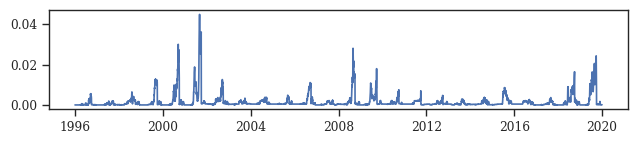

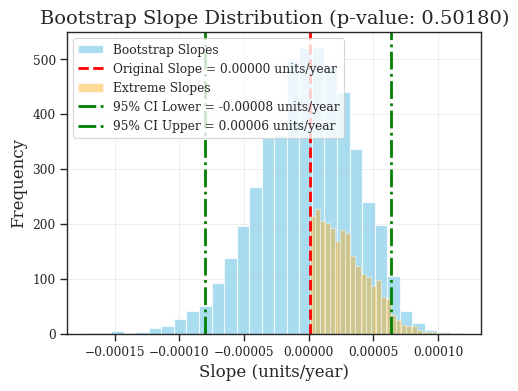

-8.010976099545929e-05 6.394500463923988e-05
-------------------------------------------------------------
1.4305749126838858e-12
-0.0006727657418056858
Slope: 4.511461044639902e-05
Original Standard Error: 1.8174761747094345e-13
Adjusted Standard Error: 1.2534128314429589e-12
Original p-value: 3.930200553242608e-15
adjusted p-value: 0.2552238508834739
slope_ci (-1.0424857741346208e-12, 3.903635599502392e-12)


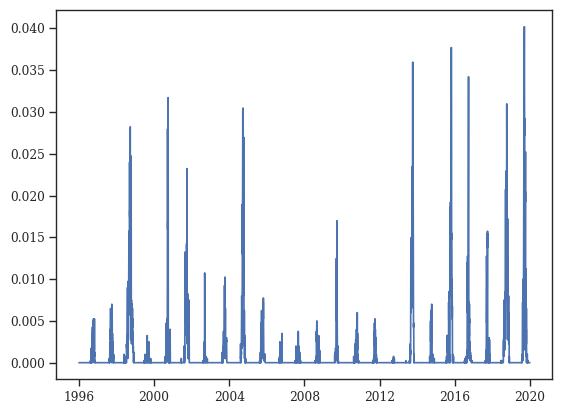

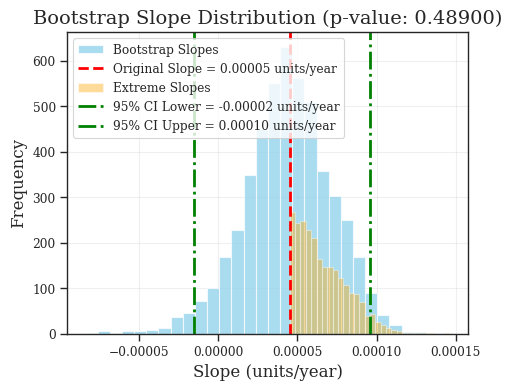

-1.527318533677905e-05 9.598757722021027e-05
-------------------------------------------------------------
6.287367804535259e-15
1.8153574735146872e-05
Slope: 1.9827843108382394e-07
Original Standard Error: 6.448977096147007e-15
Adjusted Standard Error: 3.322248043345718e-14
Original p-value: 0.3296167721107044
adjusted p-value: 0.8500135075855826
slope_ci (-5.906842703767042e-14, 7.164316264674095e-14)


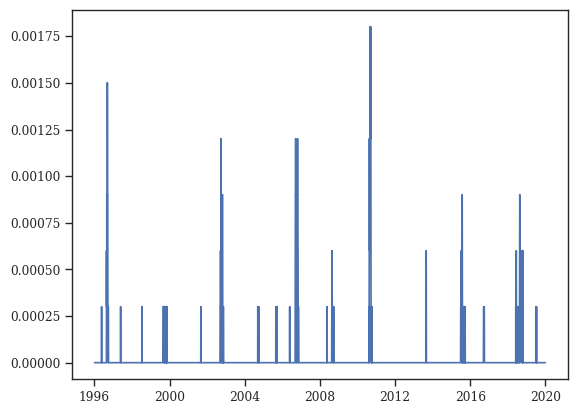

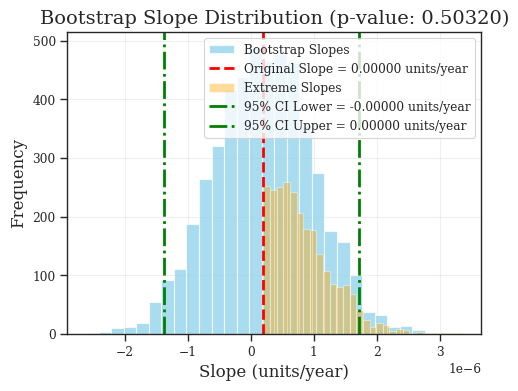

-1.3736548083758883e-06 1.7174436023863345e-06
-------------------------------------------------------------
-1.9000187136386866e-13
0.0004618031108097677
Slope: -5.9918990153309626e-06
Original Standard Error: 6.209858208718316e-14
Adjusted Standard Error: 2.2675333459914502e-13
Original p-value: 0.0022224217468519354
adjusted p-value: 0.4023793028405893
slope_ci (-6.352524310579421e-13, 2.552486883302047e-13)


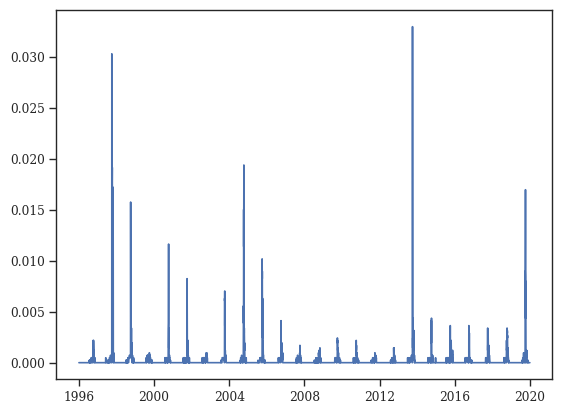

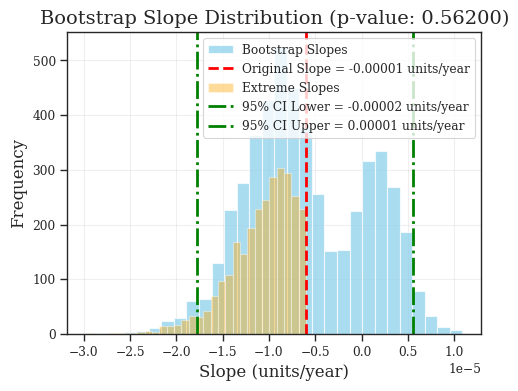

-1.7776336582037422e-05 5.54598890498869e-06
-------------------------------------------------------------
2.6276275518004563e-12
-9.093022175187329e-05
Slope: 8.28648624735792e-05
Original Standard Error: 4.4273493320255705e-13
Adjusted Standard Error: 3.673212559006607e-12
Original p-value: 3.0502502674145217e-09
adjusted p-value: 0.47572397527956856
slope_ci (-4.641917931956903e-12, 9.897173035557817e-12)


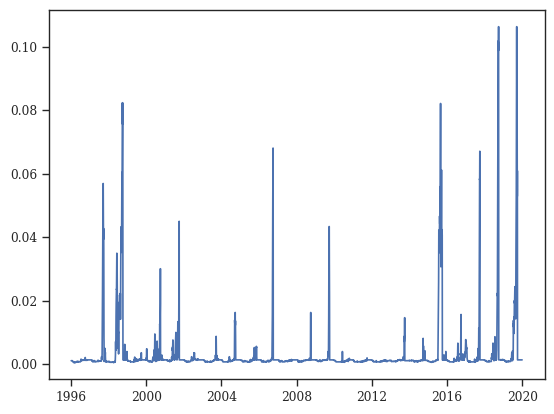

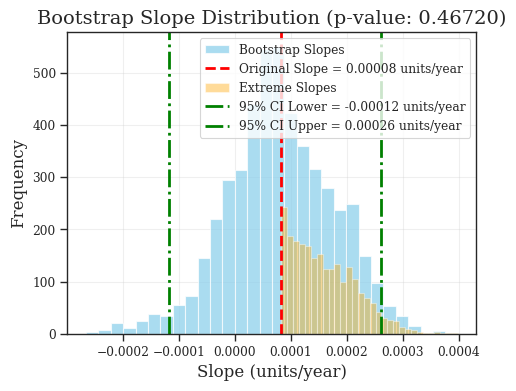

-0.00011811028840410708 0.00026058365785148346
-------------------------------------------------------------
1.221052098071055e-13
0.0007308506957129884
Slope: 3.850709896476879e-06
Original Standard Error: 1.4473649692132738e-13
Adjusted Standard Error: 1.0718413887882015e-12
Original p-value: 0.3988947444797639
adjusted p-value: 0.9094452157656412
slope_ci (-1.994896359691766e-12, 2.2391067793059774e-12)


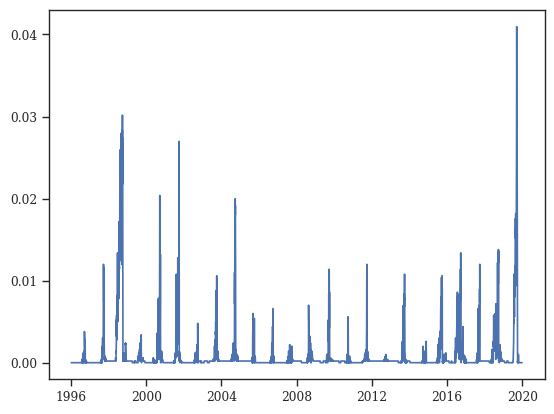

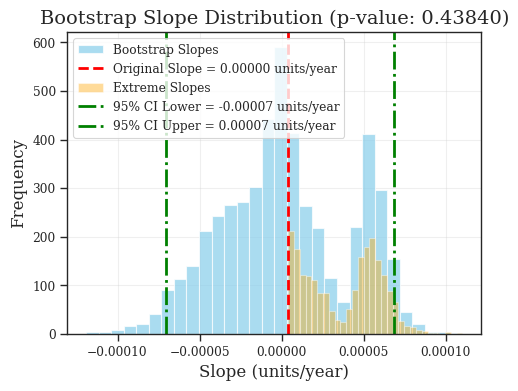

-7.027573114961255e-05 6.863157986571069e-05


In [14]:
#import pymannkendall as mk
figprops = dict(figsize=(Wf,Hf))
fig = plt.figure(**figprops)
for cluster_id in np.arange(6):
    var=dual_extreme[3]
    ax = fig.add_subplot(6,1,cluster_id+1)
    #fig, ax = plt.subplots(1,1, figsize = (Wf,Hf))
    for ii,label in enumerate(['Upwelling', 'Downwelling']):
        name0='pickles/'+label+'_'+str(cluster_id)+'_'+dual_extreme[idx][0]+dual_extreme[idx][1]+'_corr.pickle'
        #name0=label+'_0'+var +'.pickle'
        with open(name0, 'rb') as fid:
            df = pickle.load(fid)
        color=mcolors[ii]
        if ii==0:
            upw=df.to_dataset(name='var', promote_attrs=True)   
        else:
            dwn=df.to_dataset(name='var', promote_attrs=True) 
    #color=colors[idx]
    merged_da = xr.merge([dwn,upw])
    #print(merged_da.time, merged_da)
    X=merged_da.time.values
    Y=merged_da['var'].values
    #print('X,Y',X, Y)
    plt.plot(X,Y)
    XX=np.array([x.astype('datetime64[s]').astype('int') for x in X])
    print('-------------------------------------------------------------')
    
    
    # 1. Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(XX, Y)
    #print('XX', XX)
    print(slope)
    print(intercept)
    # 2. Calculate residuals
    y_pred = intercept + slope * XX
    residuals = Y - y_pred
    
    # 3. Calculate lag-1 autocorrelation of residuals
    r1 = np.corrcoef(residuals[:-1], residuals[1:])[0, 1]
    
    # 4. Calculate effective sample size
    Nt = len(Y)
    Ne = Nt * (1 - r1) / (1 + r1)
    
    # 5. Adjust standard error of the slope
    adjusted_std_err = std_err * np.sqrt(Nt / Ne)
    
    # Output results
    print(f"Slope: {3600.*24*365*slope}")
    print(f"Original Standard Error: {std_err}")
    print(f"Adjusted Standard Error: {adjusted_std_err}")
    print(f"Original p-value: {p_value}")
    
    # You can also recalculate the t-statistic and p-value using the adjusted standard error:
    
    # Calculate the t-statistic
    t_stat = slope / adjusted_std_err
    
    # Calculate the p-value based on the adjusted effective sample size (Ne)
    adjusted_p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=Ne-2))
    print(f"adjusted p-value: {adjusted_p_value}")
    alpha = 0.05 #confidence interval
    t_critical = stats.t.ppf(1 - alpha/2, df=Ne - 2)

    # Compute confidence intervals based on the adjusted standard errors
    slope_ci = (slope - t_critical * adjusted_std_err, slope + t_critical * adjusted_std_err)
    intercept_ci = (intercept - t_critical * adjusted_std_err, intercept + t_critical * adjusted_std_err)
    print('slope_ci', slope_ci)

    slope, bs_slopes,p_value = block_bootstrap_trend_with_visualization(
    Y, X, n_iterations=5000
)    

In [15]:
type(XX)

numpy.ndarray